In [37]:
import pandas as pd

In [38]:
users = pd.read_csv('Churn_Modelling.csv', sep=',')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
users.shape

(10000, 14)

# Работа с признаками :

## 1. Создание признака

    Создавать новые признаки

In [40]:
users['new_feature'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


    Создовать признак при использовании существующего признака

In [41]:
users['Age (days)'] = users['Age'] * 365
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days)
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695


    Или же можно пройтись по циклы, используя метод iterrows(), в этом случае мы итерируемся по строкам и получаем все значения одного объекта за раз:

In [42]:
for i, row in users.iloc[:1].iterrows():
    print(i)
    print('__' * 30)

0
____________________________________________________________


    Результат работы можем записать в заранее подготовленный массив:

In [71]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    И затем добавить этот массив в датафрейм:

In [44]:
users['Age (days) 2'] = age_days
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695


#### Но одна проблема с перебором всех строк датафрейма в цикле - это очень долго.
    Поэтому можем пользоваться методом apply, который ускоряет обход всех строк. Для этого нужно реализовать функцию (или же пользоваться анонимными функциями) и передать её в метод apply:

In [45]:
def age_to_days(x):
    return x * 365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


    Если в вашем наборе данных очень много строк, то и выполнение apply может затянуться, в этом случае можно визуализировать процесс обхода датафрейма через библиотеку tqdm:

In [46]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\psvak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [69]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001)
    return x * 365

users['Age'].progress_apply(age_to_days)

100%|██████████| 10000/10000 [00:16<00:00, 604.51it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

## 2. Удаление признаков

    Чтобы удалить столбец из таблицы можем пользоваться методом drop():

In [70]:
users.drop(columns='new_feature')
users.head()

KeyError: "['new_feature'] not found in axis"

#### Но замечаем такую особенность, что признак всё равно на месте, он не удалился.
    Чтобы он на самом деле исчез нужно либо явно переопределить датафрейм:

In [ ]:
users = users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


In [ ]:
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


In [ ]:
users = users.drop(columns=['Balance','NumOfProducts','HasCrCard','IsActiveMember','Exited'])
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,101348.88,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,112542.58,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,113931.57,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,93826.63,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,15695,15695,15695


In [ ]:
users['new_feature'] = 0

    Чтобы явно не переопределить датафрейм, необходимо указать атрибут inplace=True:

In [ ]:
users.drop(columns='new_feature', inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,101348.88,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,112542.58,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,113931.57,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,93826.63,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,15695,15695,15695


In [ ]:
users.drop(columns=['Age (days)', 'Age (days) 2', 'Age (days) 3'], inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,113931.57
3,4,15701354,Boni,699,France,Female,39,1,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,79084.10


## 3. Изменение признака

    Создаем метку для обозначения перезаписи датасерии

In [ ]:
users['target'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,target
0,1,15634602,Hargrave,619,France,Female,42,2,101348.88,0
1,2,15647311,Hill,608,Spain,Female,41,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,113931.57,0
3,4,15701354,Boni,699,France,Female,39,1,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,0


    Чтобы изменить существующий признак пользуйтесь фильтрацией с помощью .loc, чтобы выделить нужные строки:

In [ ]:
users.loc[users['Geography'] == 'France']

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,target
0,1,15634602,Hargrave,619,France,Female,42,2,101348.88,0
2,3,15619304,Onio,502,France,Female,42,8,113931.57,0
3,4,15701354,Boni,699,France,Female,39,1,93826.63,0
6,7,15592531,Bartlett,822,France,Male,50,7,10062.80,0
8,9,15792365,He,501,France,Male,44,4,74940.50,0
...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,42085.58,0


    Затем указываете, какую колонку хотите изменить:

In [ ]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

    И на какой значение (без loc):
то будете наблюдать подобное предупреждение и признак не будет меняться. Всё из-за того, что меняются значения не в исходном датафрейме, а в его копии:

In [ ]:
users[users['Geography'] == 'France']['target'] = 1
users.head()

C:\Users\psvak\AppData\Local\Temp\ipykernel_8032\1082220520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users[users['Geography'] == 'France']['target'] = 1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,target
0,1,15634602,Hargrave,619,France,Female,42,2,101348.88,0
1,2,15647311,Hill,608,Spain,Female,41,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,113931.57,0
3,4,15701354,Boni,699,France,Female,39,1,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,0


    И на какой значение (c loc):

In [ ]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,target
0,1,15634602,Hargrave,619,France,Female,42,2,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,93826.63,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,0


Метод __replace()__ можем передать словарь, состоящий из старого значения и нового.
    При этом, чтобы изменения вступили в силу, нужно либо переопределить признак, либо воспользоваться атрибутом inplace=True:

In [ ]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,target
0,1,15634602,Hargrave,619,France,F,42,2,101348.88,1
1,2,15647311,Hill,608,Spain,F,41,1,112542.58,0
2,3,15619304,Onio,502,France,F,42,8,113931.57,1
3,4,15701354,Boni,699,France,F,39,1,93826.63,1
4,5,15737888,Mitchell,850,Spain,F,43,2,79084.10,0


# Метод агрегации :

## 1. Способ - вызвать метод **agg()**

In [ ]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

## 2. Способ - вызвать метод **agg()** у датафрейма

    Это значит, что после переменной с датафреймом нужно через точку указать название метода .replace. В вызов этого метода можно передать словарь, где
* ключ - название признака;
* значение - список желаемых агрегаций

In [ ]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


## 3. Способ - вызвать метод **agg()** у датафрейма и передать аргументы (которые будут названиями строк) со значениями кортежа:

    именуем колонки спомощью кортежей

In [ ]:
users.agg(
    min_age=('Age', 'min'),
    max_age=('Age', 'max'),
    mean_salary=('EstimatedSalary', 'mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100090.239881


# Метод обьединения

## 1. Метод **merge**

    С помощью метода merge() можно объединить две таблицы по столбцам. У первого датафрейма вызываем метод merge() и в него передаем:
* второй датафрейм;
* столбец с левого датафрейма (он же первый), по которому нужно объединение (аргумент left_on);
* столбец с правого датафрейма (он же второй), по которому нужно объединение (аргумент right_on)

In [ ]:
bank = pd.read_csv('bank.csv', sep=',')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bank.shape

(10000, 14)

In [ ]:
bank.drop(columns=['RowNumber', 'EstimatedSalary', 'Surname','Geography','Gender','Age'], inplace=True)
bank.head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,2,0.00,1,1,1,1
1,15647311,608,1,83807.86,1,0,1,0
2,15619304,502,8,159660.80,3,1,0,1
3,15701354,699,1,0.00,2,0,0,0
4,15737888,850,2,125510.82,1,1,1,0


In [ ]:
merged = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
# merged = users.merge(bank, on='CustomerId')
merged.head()

,RowNumber,CustomerId,Surname,CreditScore_x,Geography,Gender,Age,Tenure_x,EstimatedSalary,target,CreditScore_y,Tenure_y,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,Hargrave,619,France,F,42,2,101348.88,1,619,2,0.00,1,1,1,1
1,2,15647311,Hill,608,Spain,F,41,1,112542.58,0,608,1,83807.86,1,0,1,0
2,3,15619304,Onio,502,France,F,42,8,113931.57,1,502,8,159660.80,3,1,0,1
3,4,15701354,Boni,699,France,F,39,1,93826.63,1,699,1,0.00,2,0,0,0
4,5,15737888,Mitchell,850,Spain,F,43,2,79084.10,0,850,2,125510.82,1,1,1,0


In [ ]:
merged.drop(columns=['RowNumber', 'CreditScore_x', 'Tenure_x','Balance_x','NumOfProducts_x','Age (days)','Age (days) 2','Age (days) 3'], inplace=True)
merged.head()

KeyError: "['Balance_x', 'NumOfProducts_x', 'Age (days)', 'Age (days) 2', 'Age (days) 3'] not found in axis"

## 2. Метод **join**

    Данный метод объединяет две таблицы по индексам, поэтому для успешного объединения нужно указать индексы:

In [ ]:
users_id = users.set_index('CustomerId')
users_id.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature,Age (days),Age (days) 2,Age (days) 3
CustomerId,,,,,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


In [ ]:
users_id.drop(columns=['RowNumber', 'CreditScore', 'Tenure','Balance','NumOfProducts','Age (days)','Age (days) 2','Age (days) 3'], inplace=True)
users_id.head()

,Surname,Geography,Gender,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_feature
CustomerId,,,,,,,,,
15634602,Hargrave,France,Female,42,1,1,101348.88,1,0
15647311,Hill,Spain,Female,41,0,1,112542.58,0,0
15619304,Onio,France,Female,42,1,0,113931.57,1,0
15701354,Boni,France,Female,39,0,0,93826.63,0,0
15737888,Mitchell,Spain,Female,43,1,1,79084.10,0,0


In [ ]:
users_id.drop(columns=['HasCrCard', 'IsActiveMember', 'Exited'], inplace=True)
users_id.head()

,Surname,Geography,Gender,Age,EstimatedSalary,new_feature
CustomerId,,,,,,
15634602,Hargrave,France,Female,42,101348.88,0
15647311,Hill,Spain,Female,41,112542.58,0
15619304,Onio,France,Female,42,113931.57,0
15701354,Boni,France,Female,39,93826.63,0
15737888,Mitchell,Spain,Female,43,79084.10,0


In [ ]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CustomerId,,,,,,,
15634602,619,2,0.00,1,1,1,1
15647311,608,1,83807.86,1,0,1,0
15619304,502,8,159660.80,3,1,0,1
15701354,699,1,0.00,2,0,0,0
15737888,850,2,125510.82,1,1,1,0


    И затем вызвать метод join у одного из датафреймов:

In [ ]:
bank_id.join(users_id).head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,new_feature
CustomerId,,,,,,,,,,,,,
15634602,619,2,0.00,1,1,1,1,Hargrave,France,Female,42,101348.88,0
15647311,608,1,83807.86,1,0,1,0,Hill,Spain,Female,41,112542.58,0
15619304,502,8,159660.80,3,1,0,1,Onio,France,Female,42,113931.57,0
15701354,699,1,0.00,2,0,0,0,Boni,France,Female,39,93826.63,0
15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,Female,43,79084.10,0


    Чтобы вытащить уникальные идентификаторы пользователей из индексов можно вызвать атрибут reset_index():

In [ ]:
bank_id.join(users_id).reset_index().head()

,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Surname,Geography,Gender,Age,EstimatedSalary,new_feature
0,15634602,619,2,0.00,1,1,1,1,Hargrave,France,Female,42,101348.88,0
1,15647311,608,1,83807.86,1,0,1,0,Hill,Spain,Female,41,112542.58,0
2,15619304,502,8,159660.80,3,1,0,1,Onio,France,Female,42,113931.57,0
3,15701354,699,1,0.00,2,0,0,0,Boni,France,Female,39,93826.63,0
4,15737888,850,2,125510.82,1,1,1,0,Mitchell,Spain,Female,43,79084.10,0


In [ ]:
bank.shape

(10000, 8)

## 3. Атрибут **how**
В методах merge и join есть атрибут how, который позволяет указать способ объединения таблиц.

<img src="https://itproger.com/img/courses/1550660883.jpg" width="700" height="400" alt="" />

* left - остаются все объекты с левого датафрейма и ищутся совпадения из правого
* right - остаются все объекты с правого датафрейма и ищутся совпадения из левого
* inner - остаются объекты, которые есть и в левом датафрейме, и в право
* outer - остаются все объекты из двуз датафреймов

    Возьмем небольшие два датафрейма для наглядности:

In [ ]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)

,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


    А теперь объединим их с помощью merge с атрибутом how=’left’:

In [ ]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


Все строки с левого датафрейма сохранились, а вот с правого одна потерялась, потому что в левом датафрейме не было значения в col_1 равное 4, поэтому эта строка не появилась в результирующем датафрейме.

    Теперь объединим их с помощью how=’right’:

In [ ]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


Остались все строки с правого датафрейма, а с левого две не оказались в результирующем датафрейме.

    Следующий пример - атрибут how=’inner’:

In [ ]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


    И заключительный пример с how=’outer’:

In [ ]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


# Методы группировки

## 1. Метод **groupby**

В данном методе вначале происходит разбиение на группы, а затем можно сделать агрегацию по любой агрегирующей функции:
<img src="https://i0.wp.com/lifewithdata.com/wp-content/uploads/2022/02/group2.jpeg?resize=798%2C419&ssl=1" width="700" height="400" alt="" />

    Рассмотрим принцип работы на небольшом наборе данных:

In [ ]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


    Сделаем группировку по идентификатору клиента, на выходе видим результат группировки:

In [ ]:
grouped = toy_df.groupby('client_id')
grouped

    По атрибуту groups можем получить 3 группы наших клиентов и их индексы:

In [ ]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

    И теперь можем делать любые агрегации, которые захотим, при этом их может быть несколько:

In [ ]:
grouped.sum()

C:\Users\psvak\AppData\Local\Temp\ipykernel_11176\2368404282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.sum()


,price
client_id,
1,3256
2,582
3,39


In [ ]:
grouped.agg({'price': ['sum', 'min', 'max']})

price           
            sum  min   max
client_id                 
1          3256   68  2099
2           582  280   302
3            39   39    39

    И посмотрим группировки на данных про клиентов банка, для этого сгруппируем их по признаку Geography и найдем средний возраст и минимальную заработную плату по странам:

In [ ]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


## 2. Метод **pivot_table**
__*pivot_table*__ (сводная таблица) - это мощный инструмент для обобщения и представления данных.

Параметры __*pivot_table()*__:
* index – столбец, который будет использован для строк
* columns – столбец, который будет использован для столбцов
* values – столбец обрабатываемых значений
* aggfunc – функция, применяемая к values
* fill_value – значение по умолчанию
* margins – если True, то добавляется столбец All (Итого)

    Вызовем pivot_table для игрушечного примера. Посчитаем сумму для столбца price для клиентов:

In [ ]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


    При этом в атрибут aggfunc можно передавать словарь и тем самым мы получим точно такую же группировку, как и при использовании groupby:

In [ ]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


## 3. Функция **crosstab**
Функция __*crosstab*__ создает таблицу кросс-табуляции, которая по умолчанию может показать частоту, с которой появляются определенные группы данных.

Параметры __*crosstab*__:
* index – значения для группировки по строкам
* columns – значения для группировки по столбцам
* values – агрегируемый столбец (или столбцы)
* aggfunc – функция, которая будет применена к каждой группе значений values, сгруппированным по значениям index и columns. Значения этой функции и есть значения сводной таблицы
* normalize: boolean, {'all', 'index', 'columns'} - нормировка всей таблицы (или только по строкам/столбцам)

    По умолчанию crosstab подсчитывает количество значений в каждой выделенной категории, таким образом мы можем посчитать, сколько у нас есть людей разных полов в зависимости от страны. При этом обратите внимание, что в атрибуты нужно передавать всю колонку, а не только название признака:

In [ ]:
users.pivot_table(index='Geography',
                  columns='Gender', 
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,Female,Male,Total
Geography,,,
France,99564.252755,100174.252495,99899.180814
Germany,102446.424124,99905.033959,101113.435102
Spain,100734.107475,98425.687680,99440.572281
Total,100601.541382,99664.576931,100090.239881


In [ ]:
users.pivot_table(index=users.Geography,
                  columns=users.Gender 
                  )

C:\Users\psvak\AppData\Local\Temp\ipykernel_11176\2952420589.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  users.pivot_table(index=users.Geography,


Age               Age (days)                Age (days) 2  \
Gender        Female       Male        Female          Male        Female   
Geography                                                                   
France     38.773994  38.296404  14152.507740  13978.187432  14152.507740   
Germany    40.154233  39.424772  14656.295054  14390.041793  14656.295054   
Spain      39.199265  38.649135  14307.731864  14106.934438  14307.731864   

                         Age (days) 3                      Balance  \
Gender             Male        Female          Male         Female   
Geography                                                            
France     13978.187432  14152.507740  13978.187432   60322.670159   
Germany    14390.041793  14656.295054  14390.041793  119145.966471   
Spain      14106.934438  14307.731864  14106.934438   59862.092534   

                          ... IsActiveMember           NumOfProducts  \
Gender              Male  ...         Female      Male        Female   
Geography                 ...                                          
France      63546.284875  ...       0.513932  0.519070      1.547545   
Germany    120259.668222  ...       0.468567  0.523556      1.511316   
Spain       63352.833746  ...       0.516988  0.539625      1.573003   

                       RowNumber                 Tenure           new_feature  \
Gender         Male       Female         Male    Female      Male      Female   
Geography                                                                       
France     1.517254  4996.441840  5048.870687  4.950022  5.049401           0   
Germany    1.527356  5004.213747  4996.712006  4.965633  5.050152           0   
Spain      1.512968  4764.689624  5096.582853  5.000000  5.057637           0   

                
Gender    Male  
Geography       
France       0  
Germany      0  
Spain        0  

[3 rows x 30 columns]

    Можем добавить и колонку, которую надо агрегировать, теперь подсчитываем, какая средняя зарплата в зависимости от пола и страны человека:

In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

Gender,Female,Male
Geography,,
France,99564.252755,100174.252495
Germany,102446.424124,99905.033959
Spain,100734.107475,98425.687680


    В функции crosstab есть нормировка по значениям:

- атрибут normalize=’all’ - нормировка по всем значениям

In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,Female,Male
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


- атрибут normalize=’index’ - нормировка по строкам

In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,Female,Male
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


- атрибут normalize=’columns’ - нормировка по столбцам

In [ ]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,Female,Male
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


# Встроенные визуализации

1. hist() - гистограмма. С помощью неё можем изучить распределение возраста наших клиентов:

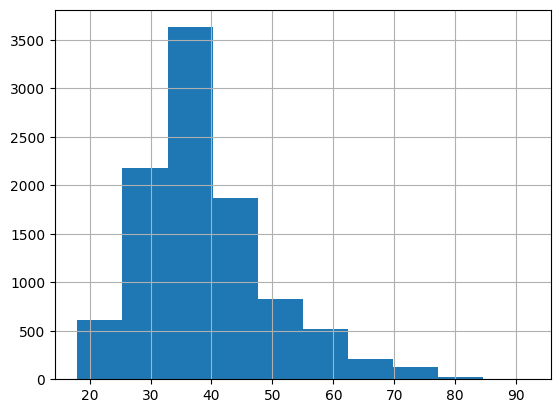

In [ ]:
users['Age'].hist();

2. pie() - круговая диаграмма, с помощью неё поизучаем долю мужчин и долю женщин среди наших клиентов:

In [ ]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

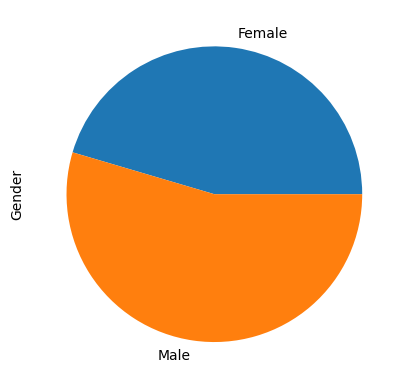

In [ ]:
data.plot.pie(y='Gender');

3. scatter() - точечный график, он показывает взаимное распределение признаков. Изучим, а есть ли зависимость между возрастом клиента и его заработной платой:

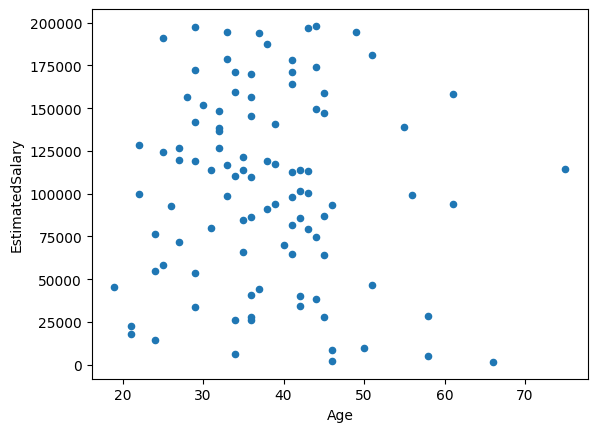

In [ ]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

4. bar() - столбчатая диаграмма, показывает количество объектов в каждой категории. Посмотрим, сколько уже лет люди являются клиентами нашего банка:

In [ ]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: num_clients, dtype: int64

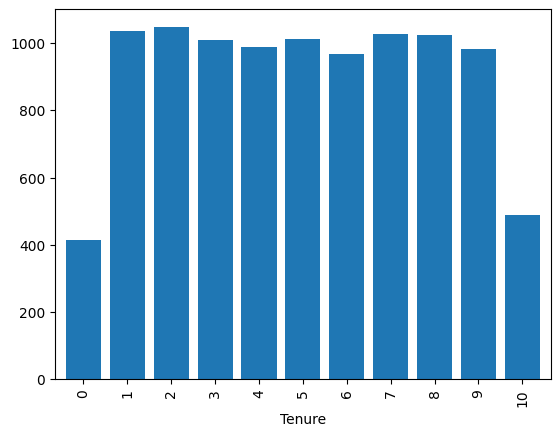

In [ ]:
data.plot.bar(width=0.8);